## Problem Accuracy
This model predicts average life expectancy for diverse countries based on some health and economic features.

In [94]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [95]:
# read CSV file
pd.set_option('display.max_columns',None)
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [97]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

## Data Cleaning

In [98]:
# Remove space from column names
df.rename(columns = {'Life expectancy ': 'Life expectancy', 'Measles ':'Measles', ' BMI ':'BMI',
                     'under-five deaths ':'under-five deaths', 'Diphtheria ':'Diphtheria', ' HIV/AIDS':'HIV/AIDS',
                     ' thinness  1-19 years':'thinness 1-19 years',' thinness 5-9 years':'thinness 5-9 years'},
           inplace=True)

In [99]:
# To check for duplicates in the dataset
df.duplicated().value_counts()

False    2938
dtype: int64

There are no duplicates in the dataset

In [100]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [101]:
# for numerical columns with null values, fill with mean their column
df['Life expectancy'].fillna(df['Life expectancy'].mean(), inplace = True)
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(), inplace = True)
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace = True)
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)
df['Polio'].fillna(df['Polio'].mean(), inplace = True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace = True)
df['Diphtheria'].fillna(df['Diphtheria'].mean(), inplace = True)
df['GDP'].fillna(df['GDP'].mean(), inplace = True)
df['Population'].fillna(df['Population'].mean(), inplace = True)
df['thinness 1-19 years'].fillna(df['thinness 1-19 years'].mean(), inplace = True)
df['thinness 5-9 years'].fillna(df['thinness 5-9 years'].mean(), inplace = True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace = True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace = True)

In [102]:
df['Year'].value_counts()

2013    193
2015    183
2014    183
2012    183
2011    183
2010    183
2009    183
2008    183
2007    183
2006    183
2005    183
2004    183
2003    183
2002    183
2001    183
2000    183
Name: Year, dtype: int64

In [103]:
df['Life expectancy'].nunique()

363

In [104]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [105]:
cat_cols = ['Country','Year','Status']
for col in cat_cols:
  unique_values = df[col].unique()

  print(unique_values)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia'
 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea'
 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran (Islamic Republic of)'

## Exploratory Data Analysis (EDA)

In [106]:
# Distribution of countries covered
data = df.groupby('Country').aggregate({'Country':'count'}).rename(columns= {'Country':'Count of countries'})
fig = px.choropleth(data,
                   locations = data.index,
                   locationmode = 'country names',
                   color = 'Count of countries',
                   width = 800,
                   color_continuous_scale = ['yellow','green']
                   )
fig.update_layout( title = 'Distribution of Countries covered')
fig.show()

In [107]:
df.head(2)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0


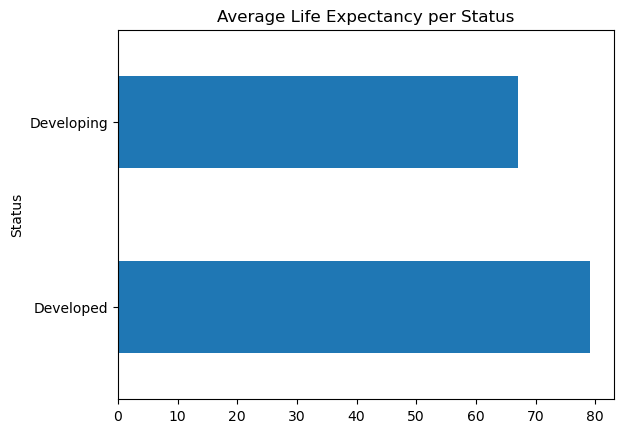

In [108]:
# Comparison of Average Life Expectancy between Developing and Developed countries
x = df.groupby('Status')['Life expectancy'].mean().sort_values(ascending=False).plot(kind='barh')
plt.title('Average Life Expectancy per Status');

 From the Horizontal barplot, the average life expectancy in developed countries is at 79 years of age, while that of developing coutries is at 67 years of age. This shows that people in developed countries tend to live longer than their counterparts in developing countries.

<Axes: >

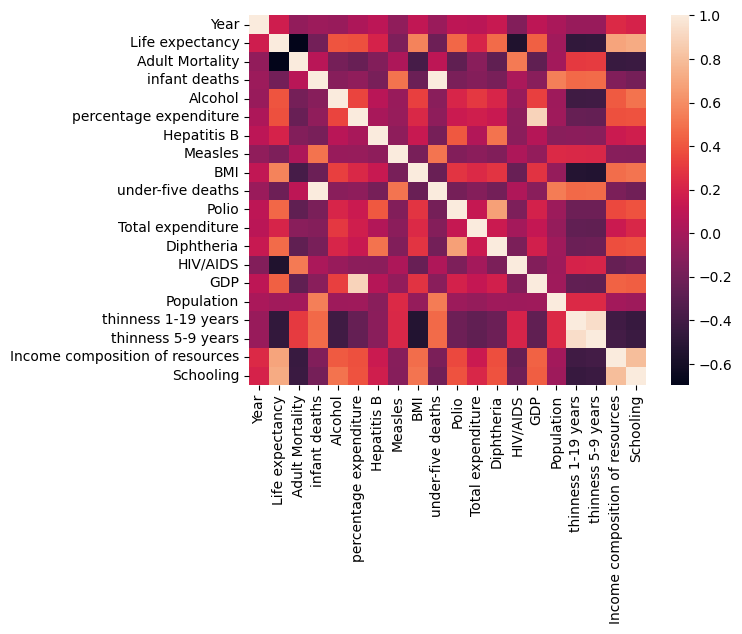

In [109]:
# Check correlation between features
corr = df.select_dtypes('number').corr()
sns.heatmap(corr)

From the heatmap figure above, some features such as HIV/AIDS and Adult Mortality has a high negative correlation with Life Expectancy. This implies that the higher this features are in a country, the lower the average life expectancy, which is as expected.

Also from the figure, some features are correlated with each other(multicollinearity), therefore, we have to drop them.

In [110]:
# Drop multicolinear columns
df_cleaned = df.drop(columns= ['thinness 1-19 years','thinness 5-9 years','under-five deaths','Income composition of resources'])

In [111]:
# Drop columns not needed
#df_cleaned.drop(columns = ['Year'], inplace=True)

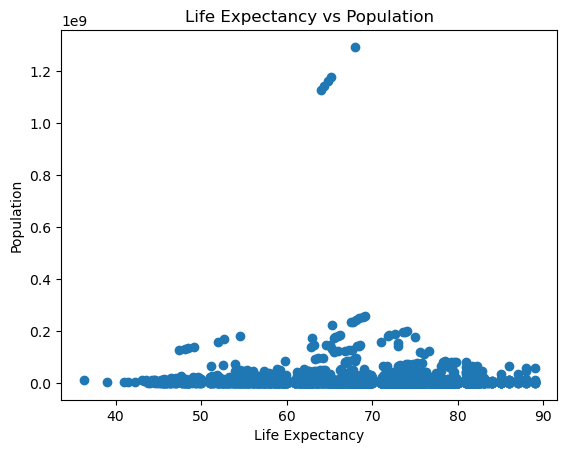

In [112]:
# Effect of population on Life expectancy
plt.scatter(x=df['Life expectancy'], y=df['Population'])
plt.xlabel('Life Expectancy')
plt.ylabel('Population')
plt.title('Life Expectancy vs Population');

From the scatter plot shown, population does not have a direct effect on the Life expectancy

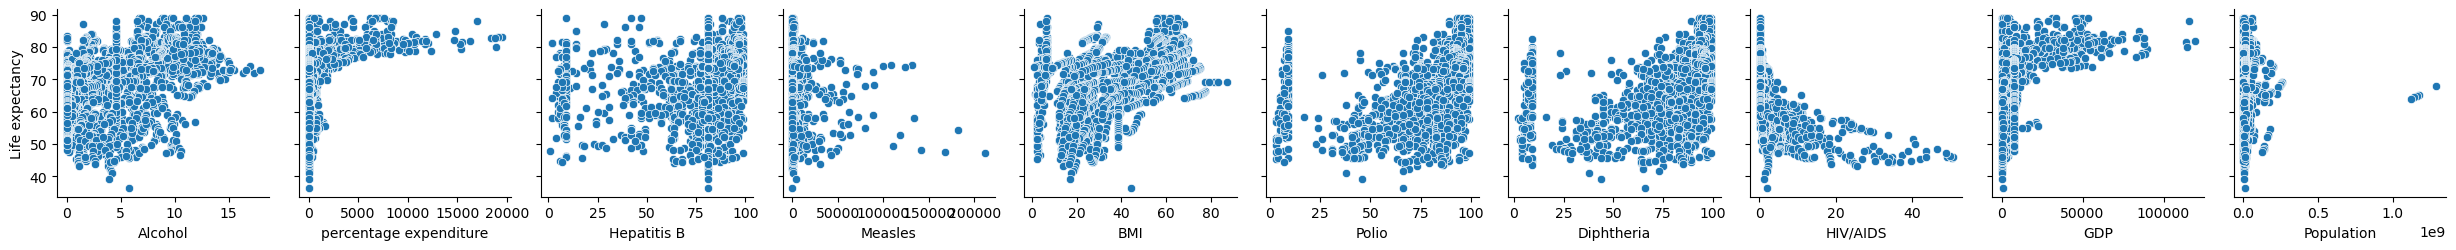

In [113]:
sns.pairplot(df, x_vars = ['Alcohol','percentage expenditure','Hepatitis B','Measles','BMI','Polio','Diphtheria','HIV/AIDS','GDP','Population'], y_vars = ['Life expectancy']);

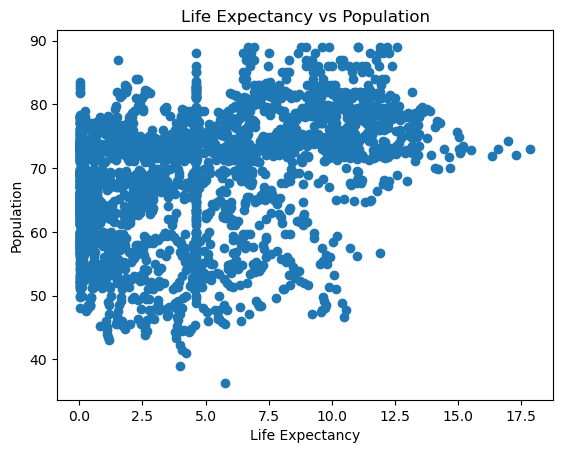

In [114]:
# Effect of population on Life expectancy
plt.scatter(x=df['Alcohol'], y=df['Life expectancy'])
plt.xlabel('Life Expectancy')
plt.ylabel('Population')
plt.title('Life Expectancy vs Population');

In [115]:
# Encode categorical features
le = LabelEncoder()
df_cleaned['Country'] = le.fit_transform(df_cleaned['Country'])
df_cleaned['Status'] = le.fit_transform(df_cleaned['Status'])

In [116]:
# Performing splitting of dataset into target and features
x = df_cleaned.drop(columns = 'Life expectancy')
y = df_cleaned['Life expectancy']

In [117]:
# Perform horizontal splitting into train and test splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [118]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [119]:
# performing Cross Validation to choose best training model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

model_lr = LinearRegression()
model_knn = KNeighborsRegressor(n_neighbors=10)
model_dt = DecisionTreeRegressor()
model_rf = RandomForestRegressor(n_estimators=100)
model_xgb = xgb.XGBRegressor(n_estimators=100)

scores_lr = cross_val_score(model_lr, x, y, cv=5, scoring='neg_mean_squared_error')
scores_knn = cross_val_score(model_knn, x, y, cv=5, scoring='neg_mean_squared_error')
scores_dt = cross_val_score(model_dt, x, y, cv=5, scoring='neg_mean_squared_error')
scores_rf = cross_val_score(model_rf, x, y, cv=5, scoring='neg_mean_squared_error')
scores_xgb = cross_val_score(model_xgb, x, y, cv=5, scoring='neg_mean_squared_error')

print(f'The average mse for the linear regression model is {scores_lr.mean()*-1}')
print(f'The average mse for the knn model is {scores_knn.mean()*-1}')
print(f'The average mse for the Decision Tree model is {scores_dt.mean()*-1}')
print(f'The average mse for the random forest model is {scores_rf.mean()*-1}')
print(f'The average mse for the xgboost model is {scores_xgb.mean()*-1}')

ModuleNotFoundError: No module named 'xgboost'

Random forest performed better than other models, therefore we will train with random forest model.

In [120]:
# Fit and train model
rfr = RandomForestRegressor()
rfr_model = rfr.fit(x_train, y_train)

In [121]:
# Make prediction with model
y_pred = rfr_model.predict(x_test)
y_pred[:5]

array([73.401, 77.222, 75.058, 76.094, 52.521])

In [122]:
# Calculate r2_score
r_squared_score = r2_score(y_test, y_pred)
r_squared_score

0.9668584958884117

In [123]:
# Calculate Mean Squared Error
rfr_mse = mean_squared_error(y_test, y_pred)
rfr_mse

2.871223385835612

In [124]:
# Calculate mean absolute error
rfr_mae = mean_absolute_error(y_test, y_pred)
rfr_mae

1.0930680550908871

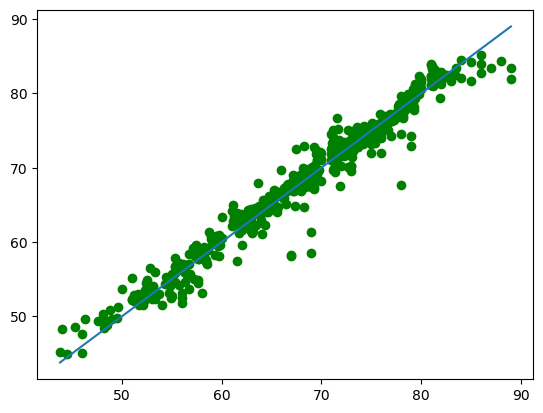

In [125]:
# Plot the linear graph
plt.scatter(y_test, y_pred, color='g')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])

In [126]:
# calculate feature importance
features = x.columns
feature_importances = rfr_model.feature_importances_
feat_imp = pd.Series(feature_importances, index=features).sort_values()
feat_imp.head()

Hepatitis B    0.002591
Diphtheria     0.003046
Population     0.003439
Measles        0.003450
Polio          0.003862
dtype: float64

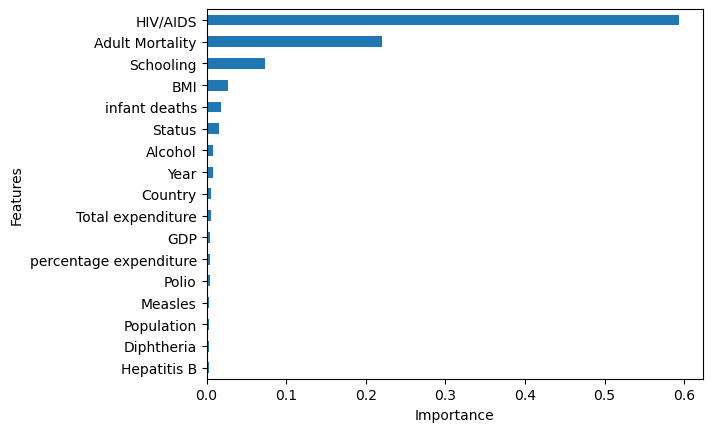

In [127]:
# Visualise Feature Importance with horizontal barchart
feat_imp.plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features');

In [128]:
feature_importances

array([0.00578552, 0.00796001, 0.01560294, 0.22035642, 0.01805779,
       0.00836807, 0.00418886, 0.00259085, 0.00345005, 0.02650748,
       0.00386181, 0.0057646 , 0.00304614, 0.59331427, 0.00420499,
       0.00343945, 0.07350074])

In [129]:
# create job lib file
from joblib import dump
dump(rfr_model, 'My_project.joblib')

['My_project.joblib']